In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
inputDF = pd.read_csv("sf_2018_listings.csv.gz")


# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 7024
Data columns (total 96 columns):
id                                  4994 non-null int64
listing_url                         4994 non-null object
scrape_id                           4994 non-null int64
last_scraped                        4994 non-null object
name                                4994 non-null object
summary                             4994 non-null object
space                               4994 non-null object
description                         4994 non-null object
experiences_offered                 4994 non-null object
neighborhood_overview               4994 non-null object
notes                               4994 non-null object
transit                             4994 non-null object
access                              4994 non-null object
interaction                         4994 non-null object
house_rules                         4994 non-null object
thumbnail_url                       4994

In [24]:
# Categorizing differernt listings based on room_type

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,2893
1,Private room,1999
2,Shared room,102


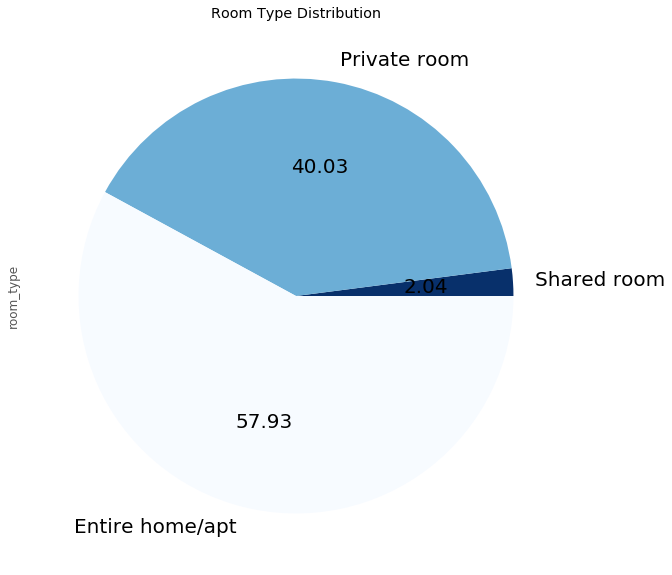

In [25]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0, 0.5, 'Number of listings')

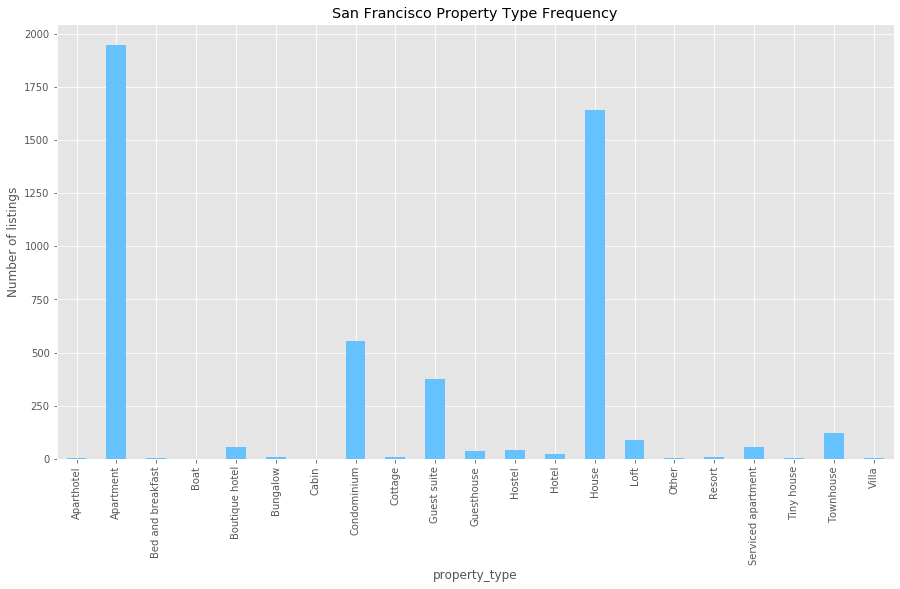

In [35]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'San Francisco Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [27]:
# prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
4,Bed and breakfast,Private room,526.750000
33,Resort,Private room,407.375000
11,Condominium,Entire home/apt,378.495775
39,Townhouse,Entire home/apt,376.142857
24,House,Entire home/apt,368.201977


In [28]:
# Average prices for each type of listing

avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

,room_type,average_Price
0,Entire home/apt,278.739371
1,Private room,128.836418
2,Shared room,79.490196


In [29]:
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
16,Mission,326
34,Western Addition,253
2,Castro/Upper Market,194
1,Bernal Heights,189
30,South of Market,183


In [30]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
27,Presidio Heights,504.411765
10,Golden Gate Park,413.000000
28,Russian Hill,395.649351
15,Marina,394.927711
17,Nob Hill,389.447761


In [31]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,Mission,326,274.450920
1,Western Addition,253,345.418972
2,Castro/Upper Market,194,298.989691
3,Bernal Heights,189,229.640212
4,South of Market,183,264.371585


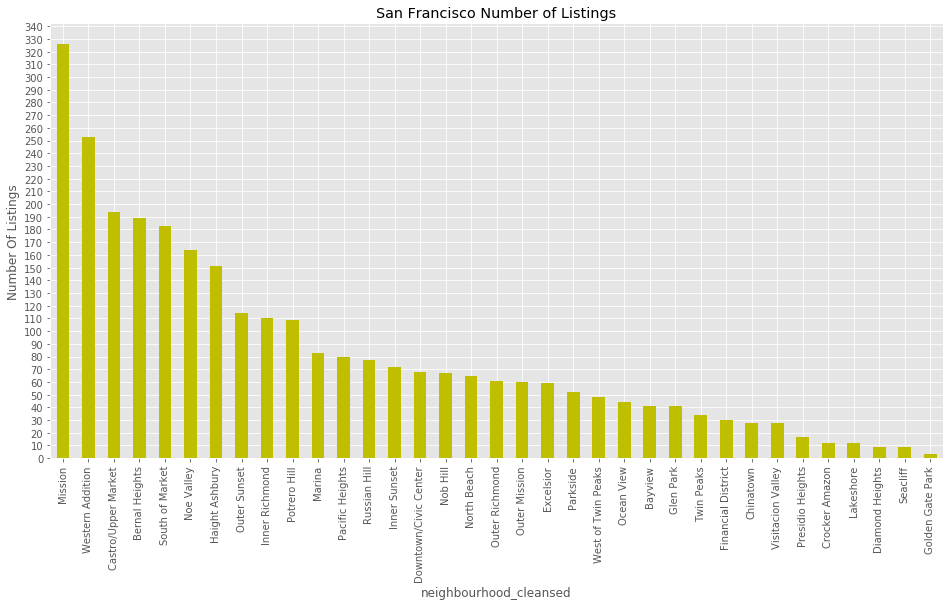

In [37]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment
objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = 'y', 
           figsize =(16,8), 
           title = 'San Francisco Number of Listings', 
           legend = False)

plt.ylabel('Number Of Listings')
plt.locator_params(nbins=50)

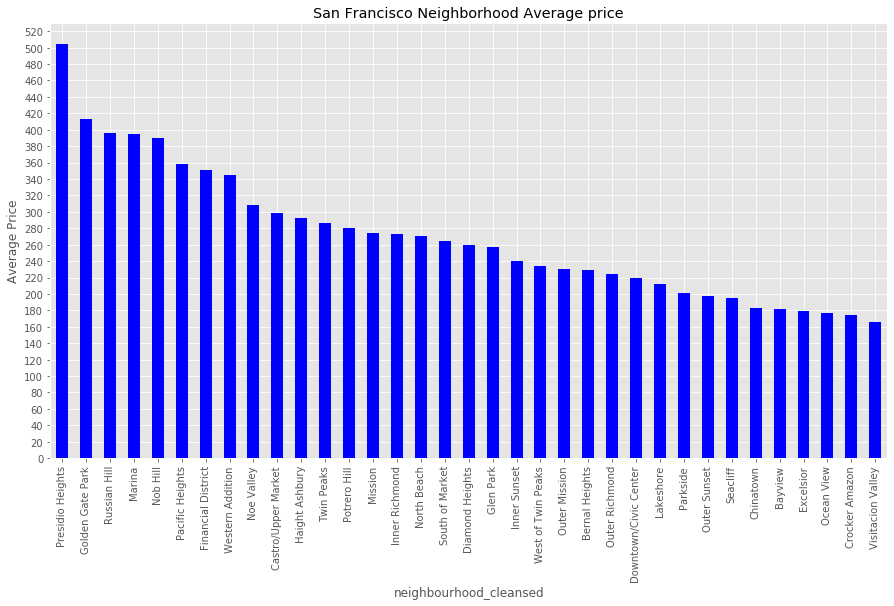

In [36]:
# visualize average price of these listings on the basis of neighbourhood where room type is entire apartment

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = 'b', 
           figsize =(15,8), 
           title = 'San Francisco Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')
plt.locator_params(nbins=50)